In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import plot_roc_curve

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import NMF, PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (confusion_matrix, precision_score, 
                                    recall_score, accuracy_score, r2_score, 
                                    plot_confusion_matrix)

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, plot_confusion_matrix
from sklearn.cluster import DBSCAN

from sklearn import (
    cluster, decomposition, ensemble, manifold, 
    random_projection, preprocessing)
from sklearn.utils.class_weight import compute_class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB

# from sklearn.neighbors import KNeighborsRegressor

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import random

## HEATHER IMPORT FUNCTIONS WHEN YOU ARE READY

In [2]:
def gridsearch_with_output(estimator, parameter_grid, X_train, y_train):
    '''
        Parameters: estimator: the type of model (e.g. RandomForestRegressor())
                    paramter_grid: dictionary defining the gridsearch parameters
                    X_train: 2d numpy array
                    y_train: 1d numpy array
        Returns:  best parameters and model fit with those parameters
    '''
    model_gridsearch = GridSearchCV(estimator,
                                    parameter_grid,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring='AUC')
    model_gridsearch.fit(X_train, y_train)
    best_params = model_gridsearch.best_params_ 
    model_best = model_gridsearch.best_estimator_
    print("\nResult of gridsearch:")
    print("{0:<20s} | {1:<8s} | {2}".format("Parameter", "Optimal", "Gridsearch values"))
    print("-" * 55)
    for param, vals in parameter_grid.items():
        print("{0:<20s} | {1:<8s} | {2}".format(str(param), 
                                                str(best_params[param]),
                                                str(vals)))
    return best_params, model_best

### Sample DF

In [3]:
df = pd.read_csv('../../../cleaned_comments.csv')

In [4]:
# df = pd.read_csv('../../../sample_df.csv')

In [5]:
# sample_df= df.sample(frac=1/2)


In [6]:
#Utilize 1/15 of data
# sample_df = pd.read_csv('../../sample_df.csv')

In [7]:
X = sample_df.text
y = sample_df.rating

NameError: name 'sample_df' is not defined

In [9]:
 y.value_counts()[0]/(y.value_counts()[1] + y.value_counts()[0])

NameError: name 'y' is not defined

### VECTORIZE AND VISUALIZE

In [10]:
# # get indices of words with highest tfidf values
# snowball = SnowballStemmer(language = 'english')
# port = PorterStemmer()
# vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', analyzer='word', strip_accents='ascii',sublinear_tf = True)
# txt_vect = vectorizer.fit_transform(X)
# features = vectorizer.get_feature_names()

# approved_features = txt_vect.toarray()[sample_df['rating']==0].mean(axis=0)
# rejected_features = txt_vect.toarray()[sample_df['rating']==1].mean(axis=0)

# approved_set = set(np.array(features)[approved_features.argsort()[::-1][:100]])
# rejected_set = set(np.array(features)[rejected_features.argsort()[::-1][:100]])
# approved_unique = approved_set.difference(rejected_set)
# rejected_unique = rejected_set.difference(approved_set)

# plot_word_cloud(' '.join(approved_unique), title = 'Accepted Rating')
# #                  save_fig=True, f_name = 'Accepted_wp.png')

# plot_word_cloud(' '.join(rejected_unique), title = 'Rejected Rating')
# #                 save_fig=True, f_name = 'Rejected_wp.png')

## Imbalanced fixed through oversampling

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.rating, stratify = df.rating, test_size=0.4)
y_train.value_counts()
#Rejected values utilize only 7 percent of the overall available data

len(y_test)/(len(y_test)+len(y_train))

0.40000033216779346

In [12]:
train_df = pd.concat([X_train, y_train], axis = 1)
ap_df = train_df[train_df.rating ==1]
rej_df = train_df[train_df.rating == 0]
#check your work
ap_df.rating.value_counts(), rej_df.rating.value_counts()

(1    1011387
 Name: rating, dtype: int64,
 0    72402
 Name: rating, dtype: int64)

In [13]:
max_val = ap_df.rating.value_counts()[1]
max_val

1011387

In [14]:
#try to oversampling the minority class?
over_rej = rej_df.sample(n = max_val, replace = True)
over_rej.rating.value_counts()

0    1011387
Name: rating, dtype: int64

In [15]:
fixed_train_df = pd.concat([over_rej, ap_df], axis = 0)

In [16]:
shuffled_df = fixed_train_df.sample(frac=1)

In [17]:
X_train = shuffled_df.text.values
y_train = shuffled_df.rating.values


In [18]:
len(y_test)/(len(y_train)+len(y_test))

0.2631868053812678

## OR Imbalance fixed through undersampling

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.rating, stratify = df.rating, test_size=0.06)
y_train.value_counts()
#Rejected values utilize only 7 percent of the overall available data

len(y_test)/(len(y_test)+len(y_train))

0.06000002214451956

In [20]:
train_df = pd.concat([X_train, y_train], axis = 1)
ap_df = train_df[train_df.rating ==1]
rej_df = train_df[train_df.rating == 0]
#check your work
ap_df.rating.value_counts(), rej_df.rating.value_counts()

(1    1584507
 Name: rating, dtype: int64,
 0    113430
 Name: rating, dtype: int64)

In [21]:
#try to undersampling the majority class?
min_val = rej_df.rating.value_counts()[0]
r = np.random.RandomState(42)
inds = np.arange(min_val)
r.shuffle(inds)
rej_df1=rej_df.iloc[inds]
ap_df1=ap_df.iloc[inds]
#put indices in a random order for selection
fixed_train_df = pd.concat([rej_df1, ap_df1], axis = 0)

In [22]:
shuffled_df = fixed_train_df.sample(frac=1)

In [23]:
shuffled_df.rating.value_counts()

1    113430
0    113430
Name: rating, dtype: int64

In [24]:
X_train = shuffled_df.text.values
y_train = shuffled_df.rating.values
shuffled_df.rating.value_counts()

1    113430
0    113430
Name: rating, dtype: int64

In [25]:
len(y_test)/(len(y_train)+len(y_test))

0.3232887581695447

## Train Test Split with Vectorizing 

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(sample_df.text, sample_df.rating, stratify = sample_df.rating, test_size=0.2)

In [50]:
snowball = SnowballStemmer(language = 'english')
port = PorterStemmer()
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', analyzer='word', strip_accents='ascii',sublinear_tf = True)
x_train_vect = vectorizer.fit_transform(X_train)
x_test_vect = vectorizer.transform(X_test.values)

In [51]:
# cv=CountVectorizer() 
# x_train_vect = cv.fit_transform(X_train)
# features = vectorizer.get_feature_names()

#### Only transform your test set on your vectorizer

## Try New vectorizing methods

In [ ]:
#in Google Colab instead

Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=ComplementNB(alpha=1.0, class_prior=None,
                                           fit_prior=True, norm=False),
                    n_jobs=None))]

In [38]:
vectorizer = TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [39]:
x_train_vect = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()

In [41]:
x_test_vect = vectorizer.transform(X_test.values)

## Random Forest with Balanced Classes
x_train_vect, x_test_vect, y_train, y_test

In [53]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state  = 1,
                               max_depth = 4, 
                               n_estimators=500, 
                              max_features = 500, 
                              min_samples_split = 2,
                              bootstrap = True,
                              min_samples_leaf = 1)
model.fit(x_train_vect, y_train)

# max_depth            | 4        | [3, 2, 4]
# min_samples_split    | 2        | [2, 4]
# min_samples_leaf     | 1        | [1, 2, 4]
# bootstrap            | True     | [True, False]

RandomForestClassifier(max_depth=4, max_features=500, n_estimators=500,
                       n_jobs=-1, random_state=1)

In [54]:
# filename = 'balanced_rf_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [55]:
y_pred = model.predict(x_test_vect)

accuracy_score(y_test, y_pred), \
    precision_score(y_test, y_pred), \
           recall_score(y_test, y_pred)

rftn, rffp, rffn, rftp = confusion_matrix(y_test, y_pred).ravel()
rftn, rffp, rffn, rftp


(0.8932357744581515, 0.9396104915972986, 0.9464202730895105)

b4 GB: (0.8306501616546348, 0.9444945499523282, 0.8696570296465899)
aftter GB: (0.8317463129456575, 0.9446224727488, 0.8707721874888781) 
(0.8952787988839187, 0.9390361276086293, 0.9493995348174871)

full_dataset
(0.8969090428454577, 0.939293085693108, 0.9509921261711004)

gridsearch on 

In [48]:
rftn, rffp, rffn, rftp = confusion_matrix(y_test, y_pred).ravel()
rftn, rffp, rffn, rftp

(5247, 1993, 47760, 53379)

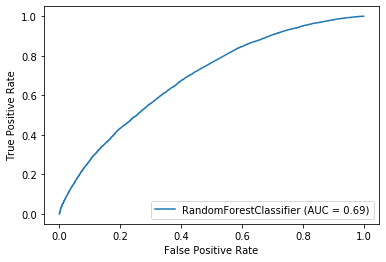

In [49]:
plot_roc_curve(model, x_test_vect, y_test)


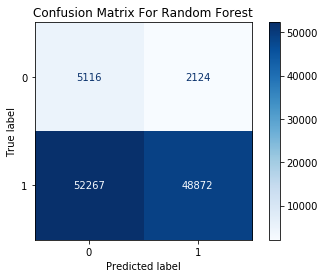

In [230]:
plot_confusion_matrix(model,x_test_vect, y_test, cmap = plt.cm.Blues)
plt.title('Confusion Matrix For Random Forest')
# plt.savefig('rf_con_mx_oversamp.png')
plt.show()

#predicts more true negatives but fewer true positives

In [151]:
# save the model to disk

 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

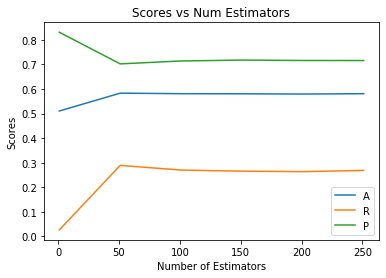

In [44]:
n_ests= np.arange(1, 300, 50)
accuracies = []
recall = []
precision = []

for n in n_ests:
    
    model = RandomForestClassifier(n_jobs=-1, 
                               random_state  = 3,
                               max_depth = 3, 
                               n_estimators=n, 
                              max_features = 60, 
                                  )
        
    model.fit(x_train_vect, y_train)
    y_pred = model.predict(x_train_vect)
    accuracies.append(accuracy_score(y_train, y_pred))
    recall.append(recall_score(y_train, y_pred))
    precision.append(precision_score(y_train, y_pred))

fig, ax = plt.subplots()
ax.plot(n_ests, accuracies, label = 'A')
ax.plot(n_ests, recall, label = 'R')
ax.plot(n_ests, precision, label = 'P')
ax.set_xlabel("Number of Estimators")
ax.set_ylabel("Scores")
ax.set_title('Scores vs Num Estimators')
# plt.savefig('RF_acur_v_feat.png')
plt.legend()
plt.show()


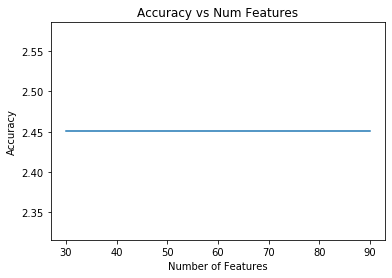

In [148]:
# num_features = np.arange(30, 100, 10)
# accuracies = []

# for n in num_features:
#     tot = 0
#     for i in range(5):
#         model = RandomForestClassifier(n_jobs=-1, 
#                                random_state  = 1,
#                                max_depth = 4, 
#                                n_estimators=500, 
#                               max_features = n)
        
#         model.fit(x_train_vect, y_train)
#         y_pred = model.predict(x_test_vect)
#         tot += accuracy_score(y_test, y_pred)
#     accuracies.append(tot)
# fig, ax = plt.subplots()
# ax.plot(num_features, accuracies)
# ax.plot
# ax.set_xlabel("Number of Features")
# ax.set_ylabel("Accuracy")
# ax.set_title('Accuracy vs Num Features')
# # plt.savefig('RF_acur_v_feat.png')
# plt.show()

## Bernoulli Naive Bayes with Balanced Classes
x_train_vect, x_test_vect, y_train, y_test

In [249]:
nb = BernoulliNB()
nb.fit(x_train_vect, y_train)

BernoulliNB()

In [250]:
# filename = 'balanced_nb_model.sav'
# pickle.dump(nb, open(filename, 'wb'))

In [251]:
y_pred = nb.predict(x_test_vect)

In [252]:
accuracy_score(y_test, y_pred), \
    precision_score(y_test, y_pred), \
           recall_score(y_test, y_pred)


(0.5063250260659353, 0.9659773443155362, 0.48817963396909203)

In [253]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(5501, 1739, 51765, 49374)

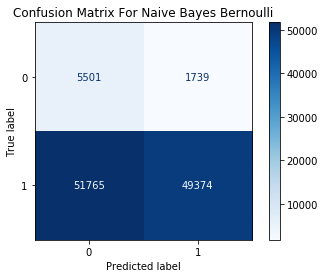

In [254]:
plot_confusion_matrix(nb,x_test_vect, y_test, cmap = plt.cm.Blues)
plt.title('Confusion Matrix For Naive Bayes Bernoulli')
# plt.savefig('nb_con_mx.png')
plt.show();

Way better at predicting positives than positives 

## ComplementNB

In [42]:
cnb = ComplementNB()
cnb.fit(x_train_vect, y_train)
# filename = 'balanced_cnb_model.sav'
# pickle.dump(nb, open(filename, 'wb'))


y_pred = cnb.predict(x_test_vect)

accuracy_score(y_test, y_pred), \
    precision_score(y_test, y_pred), \
           recall_score(y_test, y_pred)


In [43]:
accuracy_score(y_test, y_pred), \
    precision_score(y_test, y_pred), \
           recall_score(y_test, y_pred)


(0.7159597338967881, 0.9705327644092508, 0.7174087147391214)

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(5037, 2203, 28581, 72558)

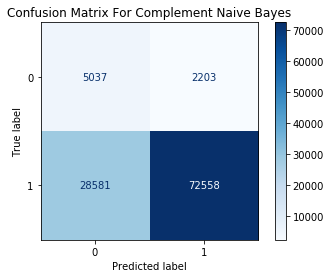

In [45]:
plot_confusion_matrix(cnb,x_test_vect, y_test, cmap = plt.cm.Blues)
plt.title('Confusion Matrix For Complement Naive Bayes')
# plt.savefig('cnb_con_mx.png')
plt.show();

## Decision Tree

In [31]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(x_train_vect, y_train)
# filename = 'balanced_cnb_model.sav'
# pickle.dump(nb, open(filename, 'wb'))


y_pred = dt.predict(x_test_vect)


In [32]:
accuracy_score(y_test, y_pred), \
    precision_score(y_test, y_pred), \
           recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(5146, 2094, 55645, 45494)

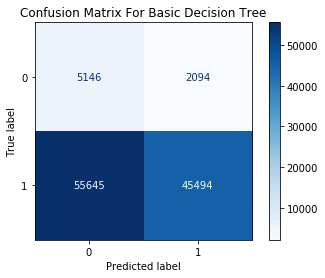

In [34]:
plot_confusion_matrix(dt,x_test_vect, y_test, cmap = plt.cm.Blues)
plt.title('Confusion Matrix For Basic Decision Tree')
# plt.savefig('dt_con_mx.png')
plt.show();

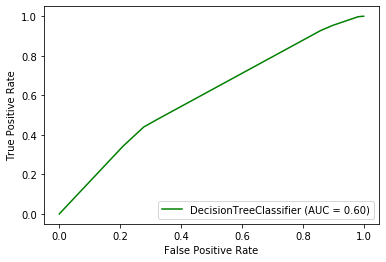

In [36]:
plot_roc_curve(dt, x_test_vect, y_test, color = 'g')


## Gradient Boosted Classifier Search

In [255]:
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.01, random_state=0)
gb.fit(x_train_vect, y_train)


GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=0)

In [256]:
# filename = 'balanced_gbst_model.sav'
# pickle.dump(nb, open(filename, 'wb'))

In [259]:
y_pred = gb.predict(x_test_vect)

accuracy_score(y_test, y_pred), \
    precision_score(y_test, y_pred), \
           recall_score(y_test, y_pred)

(0.581533322876203, 0.9575473245628424, 0.5771660783673954)

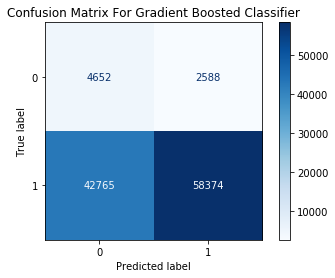

In [260]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

plot_confusion_matrix(gb,x_test_vect, y_test, cmap = plt.cm.Blues)
plt.title('Confusion Matrix For Gradient Boosted Classifier')
# plt.savefig('gb_con_mx_over_samp.png')
plt.show();

lr 0.1: (0.6365428052615262, 0.9618276771773658, 0.6358060574424923)

lr 0.01: (0.8213937729748881, 0.9464234264910029, 0.8571886083006156)

## GRIDSEARCHCV

In [79]:
#RandomForest

rf_gs = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=3, max_features = 60)

random_forest_grid = {'max_depth': [3, 2, 4],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False]}
rf_best_params, rf_best_model = gridsearch_with_output(rf_gs, 
                                                       random_forest_grid, 
                                                       x_train_vect, y_train)

# gridsearch_with_output(estimator, parameter_grid, X_train, y_train):
    

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.5min finished



Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
max_depth            | 4        | [3, 2, 4]
min_samples_split    | 2        | [2, 4]
min_samples_leaf     | 1        | [1, 2, 4]
bootstrap            | True     | [True, False]


In [108]:
gb_gs = GradientBoostingClassifier(n_estimators = 500, random_state=0, learning_rate = 0.01)

gradient_boost_grid = {'criterion' :['friedman_mse', 'mse', 'mae']}


gb_best_params, gb_best_model = gridsearch_with_output(gb_gs, 
                                                       gradient_boost_grid, 
                                                       x_train_vect, y_train)
# 'criterion' :['friedman_mse', 'mse', 'mae'],
#                      'min_impurity_decrease': [0, 0.05, 0.1]}

#warm start improvment was not significant but took way more time to complete

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [113]:
# nb = BernoulliNB(alpha = 3)

bnb_gs = BernoulliNB()

gradient_boost_grid = {'alpha':[1, 3, 5, 20]}


bnb_best_params, bnb_best_model = gridsearch_with_output(bnb_gs, 
                                                       gradient_boost_grid, 
                                                       x_train_vect, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
alpha                | 1        | [1, 3, 5, 20]


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


## Cross Valedate Test

In [123]:
sk_train_neg_rmses = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error')
sk_train_rmse = np.mean(sk_train_neg_rmses)*(-1)

In [125]:
sk_test_neg_rmses = cross_val_score(model, X_test, y_test, scoring='neg_root_mean_squared_error')
sk_test_rmse = np.mean(sk_test_neg_rmses)*(-1)

In [126]:
print(f'Sklearn train RMSE: {sk_train_rmse:0.03f}')
print(f'Sklearn test RMSE: {sk_test_rmse:0.03f}')

Sklearn train RMSE: 0.149
Sklearn test RMSE: 0.150


In [ ]:
def plot_error_vs_splitsize(X_train, y_train, n_obs_arr):
    cv_train_errors = []
    cv_test_errors = []
    for n_obs in n_obs_arr.astype('int'):
        train_error = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error')

        test_error = cross_val_score(model, X_test, y_test, scoring='neg_root_mean_squared_error')
        cv_train_errors.append(np.mean(train_error)*-1)
        cv_test_errors.append(np.mean(test_error)*-1)
    
    plt.close('all')
    
    fig, ax = plt.subplots()
    ax.plot(n_obs_arr, cv_train_errors, label='Train')
    ax.plot(n_obs_arr, cv_test_errors, label='Test')
    ax.set_xlabel('Training set size')
    ax.set_ylabel('RMSE')
    ax.legend()
    plt.show()

    
    
train_lens = np.linspace(10,100, 25)
plot_error_vs_splitsize(X_train, y_train, n_obs_arr=train_lens )


In [ ]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
# (tn, fp, fn, tp)
# (0, 2, 1, 1)

## PLOT ROC CURVES ALL MODELS

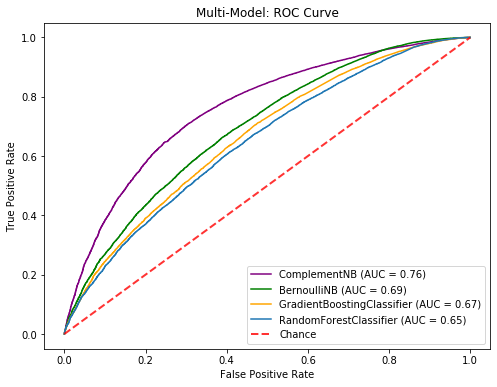

In [262]:
fig, ax = plt.subplots(1, figsize = (8,6))
plot_roc_curve(cnb, x_test_vect, y_test, ax = ax, color = 'purple')
plot_roc_curve(nb, x_test_vect, y_test, ax = ax, color = 'g')
plot_roc_curve(gb, x_test_vect, y_test, ax = ax, color = 'orange')
plot_roc_curve(model, x_test_vect, y_test, ax = ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.legend()
plt.title('Multi-Model: ROC Curve')
plt.savefig('ROC_multi_over_samp_count_v.png')
plt.show()

## PLOT PRECISION RECALL CURVES

Text(0.5, 1.0, '2-class Precision-Recall curve')

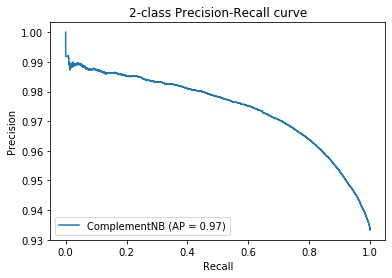

In [238]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(cnb, x_test_vect, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

## ID Phrases that are mislabeled as accepted when they should be rejected

In [239]:
y_pred = cnb.predict(x_test_vect)

In [240]:
type(y_pred)

numpy.ndarray

In [241]:
examine_df = pd.concat([X_test, y_test], axis=1)
examine_df['pred_rating'] = y_pred

In [242]:
#info that was predicted to be approved but was actually rejected
FP_df = examine_df[(examine_df['rating'] == 0)&(examine_df['pred_rating'] == 1)]

#info that was prediected to be rejected but was actually approved
FN_df = examine_df[(examine_df['rating'] == 1)&(examine_df['pred_rating'] == 0)]

#info that was predicted to be rejected and was rejected
TN_df = examine_df[(examine_df['rating'] == 0)&(examine_df['pred_rating'] == 0)]
#note num645 Yikes what a disappointing article. Written by a woman no less 

# info that was predicted positive and was positive
TP_df = examine_df[(examine_df['rating'] == 1)&(examine_df['pred_rating'] == 1)]

In [243]:
fp_randoms = random.sample(range(2613), 10)

fp_samp = []
for ind, i in enumerate(fp_randoms):
    txt = FP_df.text.values[i]
    fp_samp.append(txt)
    print(f'{ind}: \n{txt} \n')

0: 
I picture you in a crisp new brown shirt, Luger on your hip, holding your raised arm steady, and encouraging everybody on the cafe terrace to join along in singing "Edelweiss." 

1: 
In a Nation that loves to PAINT over it's systemic Racism Trump and his White House team have brought the debate to the forefront in many unintended ways . Mr. Trump's comments about Charlottesville and of course the total disparity of Aid received by our Commonwealth  Island States . The US Virgin Islands and Puerto Rico  . Their Struggle just to survive is a glaring narrative of just how deeply entrenched our Racism is in " The Land Of The Free and Home Of The Brave " Is it ANY WONDER at all why Football Players of Color take a knee during the National Anthem . We should ALL take a Knee during the National Anthem because our Nation's denial of what's obvious has become a National Pastime on many fronts not just Race .. We have become a Nation that denies the Truth and Buys the Lie because we find our

IndexError: index 1800 is out of bounds for axis 0 with size 1795

In [244]:
fn_randoms = random.sample(range(FN_df.rating.value_counts()[1]), 10)

fn_samp = []
for ind, i in enumerate(fn_randoms):
    txt = FN_df.text.values[i]
    fn_samp.append(txt)
    print(f'{ind}: \n{txt} \n')


0: 
ummm ahhhhh ummm ahhhhh ahhhh ummm, our first, ummmm guest today is, ahhhhh ummmm... 

1: 
She said she was in NYC on 9/11, and you said she had been too, she lied.  You're just being something.

She said she landed in Bosnia and had to run her car under gun fire...and she lied...and CBS has the pictures to prove she lied.

She can't help herself. She really is pathological in her lying.  

Very concerning. 

Beyond that fact that when she did have an executive position (SecState) she not only failed...she lost track of billions of dollars (GAO audit). 

We will have 4 more years of the last 30 if she gets to be president.  One scandal and coverup after another.

http://dailycaller.com/2016/11/02/who-leaked-the-cnn-debate-question-to-donna-brazile/ 

2: 
Typical Hawaii. Do nothing about the issue until it becomes a huge problem. That sounds disgusting ! 

3: 
It's obvious to me that a number of posters are disordered themselves, but not with PTSD.  More likely personality disordere

In [245]:
tn_randoms = random.sample(range(TN_df.rating.value_counts()[0]), 10)

tn_samp = []
for ind, i in enumerate(tn_randoms):
    txt = TN_df.text.values[i]
    tn_samp.append(txt)
    print(f'{ind}: \n{txt} \n')


0: 
psst hey lefty,, the pipeline is in the best interests of all canadians even bc ones, regardless of what you nut jobs think 

1: 
look for a grassy knoll 

2: 
hey protesters, get a life & a JOB. 

3: 
Fuck u Donald trump
 On my way! Come get me you little mouthless bitch. Fuck you!! Your a moron pussy butch bitch 

4: 
Donald loves the "poorly educated." 

5: 
Must be a progressive neo-fascist definition of rascist! 

6: 
Note that only the left wing nuts demand others be shut down on this website. Fact 

7: 
All illegal criminals, ICE is coming for you, we have been waiting a long time and finally you bums are leaving. No more do we have to put up with your BS.
Bye Bye criminals! 

8: 
Oh, that is sure to cause Mayor Sanctuary to have a grand mal hissy fit. 

9: 
Radicalization is taught at home, around the dinner table, as the family enjoys mom's good home cooking, while the grown ups discuss destroying Israel, eradicating homosexuals and the evils of dirty infidels It is drille

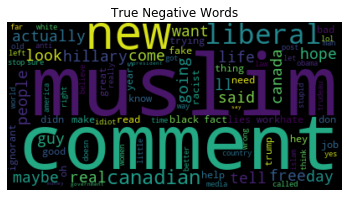

In [247]:

def plot_word_cloud(text, title, save_fig = False, f_name = None):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    if save_fig:
        plt.savefig(f_name)
        
# get indices of words with highest tfidf values
snowball = SnowballStemmer(language = 'english')
port = PorterStemmer()
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', analyzer='word', strip_accents='ascii',sublinear_tf = True)
x = TN_df.text.values
t_vect = vectorizer.fit_transform(x)
features = vectorizer.get_feature_names()

rejected_features = t_vect.toarray().mean(axis=0)
rejected_set = set(np.array(features)[rejected_features.argsort()[::-1][:100]])
plot_word_cloud(' '.join(rejected_set), title = 'True Negative Words')
#                 save_fig=True, f_name = 'tn_wordcloud.png')

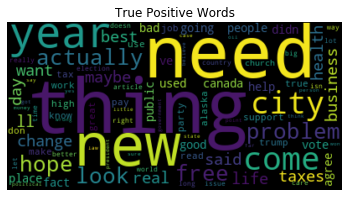

In [248]:
# get indices of words with highest tfidf values
snowball = SnowballStemmer(language = 'english')
port = PorterStemmer()
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', analyzer='word', strip_accents='ascii',sublinear_tf = True)
x = TP_df.text.values
t_vect = vectorizer.fit_transform(x)
features = vectorizer.get_feature_names()

rejected_features = t_vect.toarray().mean(axis=0)
rejected_set = set(np.array(features)[rejected_features.argsort()[::-1][:100]])
plot_word_cloud(' '.join(rejected_set), title = 'True Positive Words')
#                 save_fig=True, f_name = 'tp_wordcloud.png')